# Project Initialization & Introduction
## What is Django?
- Django is a high-level Python **web framework**, including backend and frontend
- that encourages rapid development and clean, pragmatic design. 
- It follows the "batteries included" philosophy, 
- providing many **built-in features**.
- great for **startup**

Flask, FastApi, Django are all libraries, but Django is more like a framework, more complicated

## Setting Up a Django Project

### 0. Installation

```bash
    # Create and activate virtual environment
    python3 -m venv venv
    source venv/bin/activate  # Mac/Linux
    # or: venv\Scripts\activate  # Windows

    # Install Django
    pip install django

    # Verify installation
    python3 -m django --version
```


### 1. Creating a Project
   **Project = Website/Product**    
   A project is your entire website or application. It's the container for everything.    
   ```bash
   # Create project
   django-admin startproject blogsite
   cd blogsite

   # Project structure created:
   blogsite/
   ├── manage.py              # Command-line utility
   └── blogsite/
      ├── __init__.py        # Python package marker
      ├── settings.py        # Project settings
      ├── urls.py            # URL declarations
      ├── asgi.py            # ASGI deployment
      └── wsgi.py            # WSGI deployment
   
   # Run the development server
   python3 manage.py runserver
   #  Visit: http://127.0.0.1:8000/
   ```


#### Key Files Explained

**manage.py**
- Command-line utility for administrative tasks
- Delegates to Django's management commands
- Sets DJANGO_SETTINGS_MODULE environment variable
- Used for: running server, migrations, creating apps, etc.

**settings.py**

- Contains all project configuration
- Important settings:
  - SECRET_KEY: Cryptographic signing (keep secret in production!)
  - DEBUG: True for development, False for production
  - ALLOWED_HOSTS: List of host/domain names
  - INSTALLED_APPS: Registered applications
  - DATABASES: Database configuration
  - MIDDLEWARE: Processing layers
  - TEMPLATES: Template engine settings


**urls.py (project level)**

- Root URL configuration
- Routes URLs to appropriate apps
- Uses include() to reference app-level URLs

**wsgi.py / asgi.py**

- Entry points for WSGI/ASGI-compatible web servers
- Used for deployment

### 2. Create an App and Register
**App = one Feature/Module of the project**      
An app is a self-contained module that does one specific thing. Apps are designed to be reusable and pluggable.

**Create app**
```bash
python3 manage.py startapp blog

# App structure created:
blog/
├── __init__.py
├── admin.py          # Admin interface registration
├── apps.py           # App configuration
├── models.py         # Database models
├── tests.py          # Test cases
├── views.py          # View functions/classes
└── migrations/       # Database migrations
    └── __init__.py
```

**Register App**
```python
# blogsite/settings.py
INSTALLED_APPS = [
    'blog.apps.BlogConfig',  # Add this
    # for other created apps:
    '<myapp>.apps.<Myapp>Config',
    'django.contrib.admin',
    ...
]


# <Myapp>Config is inside <myapp>/apps.py
from django.apps import AppConfig

class BlogConfig(AppConfig):
    default_auto_field = 'django.db.models.BigAutoField'
    name = 'blog'
```

#### Why Separation of Project and App?

- **Reusability**. You can take an app and use it in different projects
- **Organization**. As your project grows, apps keep code organized:
   ```text
    With apps (clean):
    mysite/                 # Project
    ├── products/           # App1
    │   ├── models.py      
    │   ├── views.py        
    │   └── urls.py         
    ├── orders/             # App2
    │   ├── models.py       
    │   └── views.py       
    └── users/              # App3
        ├── models.py       
        └── views.py        
   ```
- **Team Collaboration**. Different developers can work on different apps without conflicts
- **Testing**. You can test each app independently
- **Third-Party Apps**. Django's ecosystem is built on this concept. You can install pre-built apps. Each app is independent but they work together in the project

# MTV Architecture
Django follows **MTV (Model-Template-View) pattern**, which is similar to MVC but with different naming:

|Django **MTV** | Traditional **MVC** | Purpose |
|-----------|-----------------|---------|
|Model|Model|Data layer (database)|
|Template |View |Presentation layer (HTML)|
|View |Controller |Business logic layer|

**Why MTV?**
- Model: Defines data structure (database schema)
- Template: Defines how data is displayed (presentation)
- View: Defines what data to display (logic)

The "Controller" in Django is the framework itself (URL dispatcher).

# Models & Migrations
Silimar with Flask and FastAPI, Django ORM (Object-Relational Mapping) also allows you to interact with databases using Python code instead of SQL.

## Defining Models
Models are Python classes that inherit from `django.db.models.Model`. Each model represents a database table.

Flask: `sqlalchemy `  
FastAPI: `sqlmodel` (sqlalchemy+pydantic)  
Django:  `django.db.models`   


```python
# ./blogsite/blog/models.py: 
from django.db import models
from django.contrib.auth.models import User

class Category(models.Model):
    # CharField: Variable-length string
    name = models.CharField(max_length=50, unique=True)
    # DateTimeField: Timestamp
    created_at = models.DateTimeField(auto_now_add=True)
    
    def __str__(self):
        return self.name
    
    class Meta:
        verbose_name_plural = 'Categories'

class Post(models.Model):
    ...
class Comment(models.Model):
    ...
```

### Common Field Types & Options
- `CharField(max_length)`: Short text
- `TextField()`: Long text
- `IntegerField()`: Integer
- `BooleanField()`: True/False
- `DateTimeField()`: Date and time
- `EmailField()`: Email validation
- `URLField()`: URL validation
- `ForeignKey()`: Many-to-One
- `ManyToManyField()`: Many-to-Many
- `OneToOneField()`: One-to-One

### Common Field Options
- `null=True`: Database allows NULL
- `blank=True`: Form field not required
- `default`: Default value
- `unique=True`: Must be unique
- `choices`: List of valid values
- `auto_now_add=True`: Set on creation (once)
- `auto_now=True`: Update on every save
- `on_delete`: When using ForeignKey, specify what happens when the referenced object is deleted, more details in the next part, Relationship

### Relationships
#### One-to-Many (ForeignKey)

```python

class Post(models.Model):
    author = models.ForeignKey(User, on_delete=models.CASCADE, related_name='posts')

# Usage:
post.author              # Get the author
user.posts.all()         # Get all posts by user
```

#### Many-to-Many (ManyToManyField)
```python
class Post(models.Model):
    categories = models.ManyToManyField(Category, related_name='posts')
```
Django **automatically creates junction table**: blog_post_categories


#### on_delete Options
- `CASCADE`: Delete dependent objects
- `PROTECT`: Prevent deletion
- `SET_NULL`: Set to NULL (requires null=True)
- `SET_DEFAULT`: Set to default value
- `DO_NOTHING`: Do nothing (can cause integrity errors)

###  Meta Class
The Meta class provides metadata about the model

```python
class Category(models.Model):
    name = models.CharField(max_length=50)
    
    class Meta:
        verbose_name_plural = 'Categories'  # Plural name in admin
        ordering = ['-created_at']           # Default ordering
        db_table = 'custom_table_name'      # Custom table name
```

## User Model

### Built-in `User` Model
Django allows to import and use **built-in Django User model**, fully ready to use for:
- Creating users
- Authentication
- Login/logout
- Permissions and groups
- Querying users from the DB

```python
from django.contrib.auth.models import User
# in models
class Post(models.Model):
    author = models.ForeignKey(User, on_delete=models.CASCADE, related_name='posts')

# in views
user = User.objects.create_user(
    username="john",
    password="secret123",
    email="john@example.com"
)
```
#### *User model fields:*
- `username`: Required, unique
- `email`: Optional
- `password`: Hashed automatically
- `first_name`, `last_name`: Optional
- `is_active`: Boolean (default True)
- `is_staff`: Can access admin
- `is_superuser`: Has all permissions
- `date_joined`: Timestamp
- `last_login`: Timestamp

#### *Creating Users*
Via [Django Shell](#django-sell):
```python
from django.contrib.auth.models import User

# Method 1: Create user
user = User.objects.create_user('john', 'john@example.com', 'password123')

# Method 2: Create superuser (for admin access)
User.objects.create_superuser('admin', 'admin@example.com', 'admin123')
```

Create superuser via Command Line for [Admin](#admin-super-user):
```bash
python manage.py createsuperuser
# Follow prompts: username, email, password
```


⚠️ BUT changing the User model later is painful. So if you need to customize the User model in any way, **define a custom user model before your first migration**.

### Custom User Model
It is better to use `get_user_model()`, a built-in Django function that returns the active User model used by the project, **default User or a custom one**.    

#### *How `get_user_model()` works:*   
- Django looks at AUTH_USER_MODEL = "yourapp.CustomUser"  
- If it’s defined, Django returns custom user model.      
- If it’s NOT defined, Django returns: django.contrib.auth.models.User  

#### *Steps*
1. Create a Custom User Model (using `AbstractUser`)
    ```python
    # blog/models.py
    from django.db import models
    # from django.contrib.auth.models import User
    from django.contrib.auth.models import AbstractUser

    class User(AbstractUser):
        email = models.EmailField(unique=True)
        age = models.IntegerField(null=True)
        
        # Login with email instead of username
        USERNAME_FIELD = 'email'
        REQUIRED_FIELDS = ['username']  # Required when creating superuser
        
        def __str__(self):
            return self.email
    ```
2. Set it in `settings.py`      
   <font color=red>must be done before the first migration.</font> Changing it later is extremely difficult.
    ```python
    AUTH_USER_MODEL = 'blog.User'  # Tell Django to use your custom User model
    ```
3. Run migrations
    ```bash
    python manage.py makemigrations
    python manage.py migrate
    ```
    
4. Use `get_user_model()` in views/serializers          
   never import User directly
    ```python
    from django.contrib.auth import get_user_model
    User = get_user_model()
    # Create User
    user1 = User.objects.create_user(
        username="user1",
        password="pass123",
        phone="555-1234"
    )
    # Query Users
    users = User.objects.all()
    ```

5. Use the string in `models.py` referencing User
   
   ```python
    # if User and Order are defined in one models.py file, can use direct import:
    class Order(models.Model):
            user = models.ForeignKey(User, on_delete=models.CASCADE)
    # but the best practice is always using string reference: 
    from django.conf import settings
    class Order(models.Model):
            user = models.ForeignKey(
                settings.AUTH_USER_MODEL, 
                on_delete=models.CASCADE
            )
   ```
   
   Why `settings.AUTH_USER_MODEL`?

    - **Consistency**: If you later move models to different apps, no changes needed
    - **Django convention**: Other Django developers expect this pattern
    - **Future-proof**: Swapping user models later is easier
    


## Migrations
Migrations are Django's way of **propagating model changes to the database schema**.  

### The Three-Step Process:
1. Modify models (`models.py`)
2. Create migration file
   ```bash
   python manage.py makemigrations blog
   ```
   This creates a migration file in blog/migrations/ **describing the changes**.
3. Apply migrations
   ```bash
   python manage.py migrate
   ```
   This executes the SQL to **update the database**.

### Migration Commands
```bash
# Create migrations for all apps
python manage.py makemigrations

# Create migration for specific app
python manage.py makemigrations blog

# Apply migrations
python manage.py migrate

# Show migrations status
python manage.py showmigrations

# View SQL for migration
python manage.py sqlmigrate blog 0001

# Revert migration
python manage.py migrate blog 0001
```

### Why Migrations Are Important
- **Version control**: Track database schema changes
- **Team collaboration**: Share database changes via code
- **Rollback:** Can revert to previous schema
- **Database portability**: Work with different databases
- **Safety**: Prevents manual SQL errors

# Connect the database
1. create database locally
2. create models (`blog/models.py`)
3. set db connection configurations (`settings.py`)
4. after first migrations, tables more than defined in models.py will be imported into database. the others are django **built-in models/tables**
5. **any changes** in `models.py` can be migrated

# Admin (super user)

1. create admin user:
   ```bash
    python manage.py createsuperuser
    # Username: admin, Password: admin123
    ```
2. Decide which functions can admin apply
   ```python
    # blog/admin.py
    # Register your models here.
    admin.site.register(Post)
    admin.site.register(Comment)
    admin.site.register(Category)
   ```
3. visit http://127.0.0.1:8000/admin/:
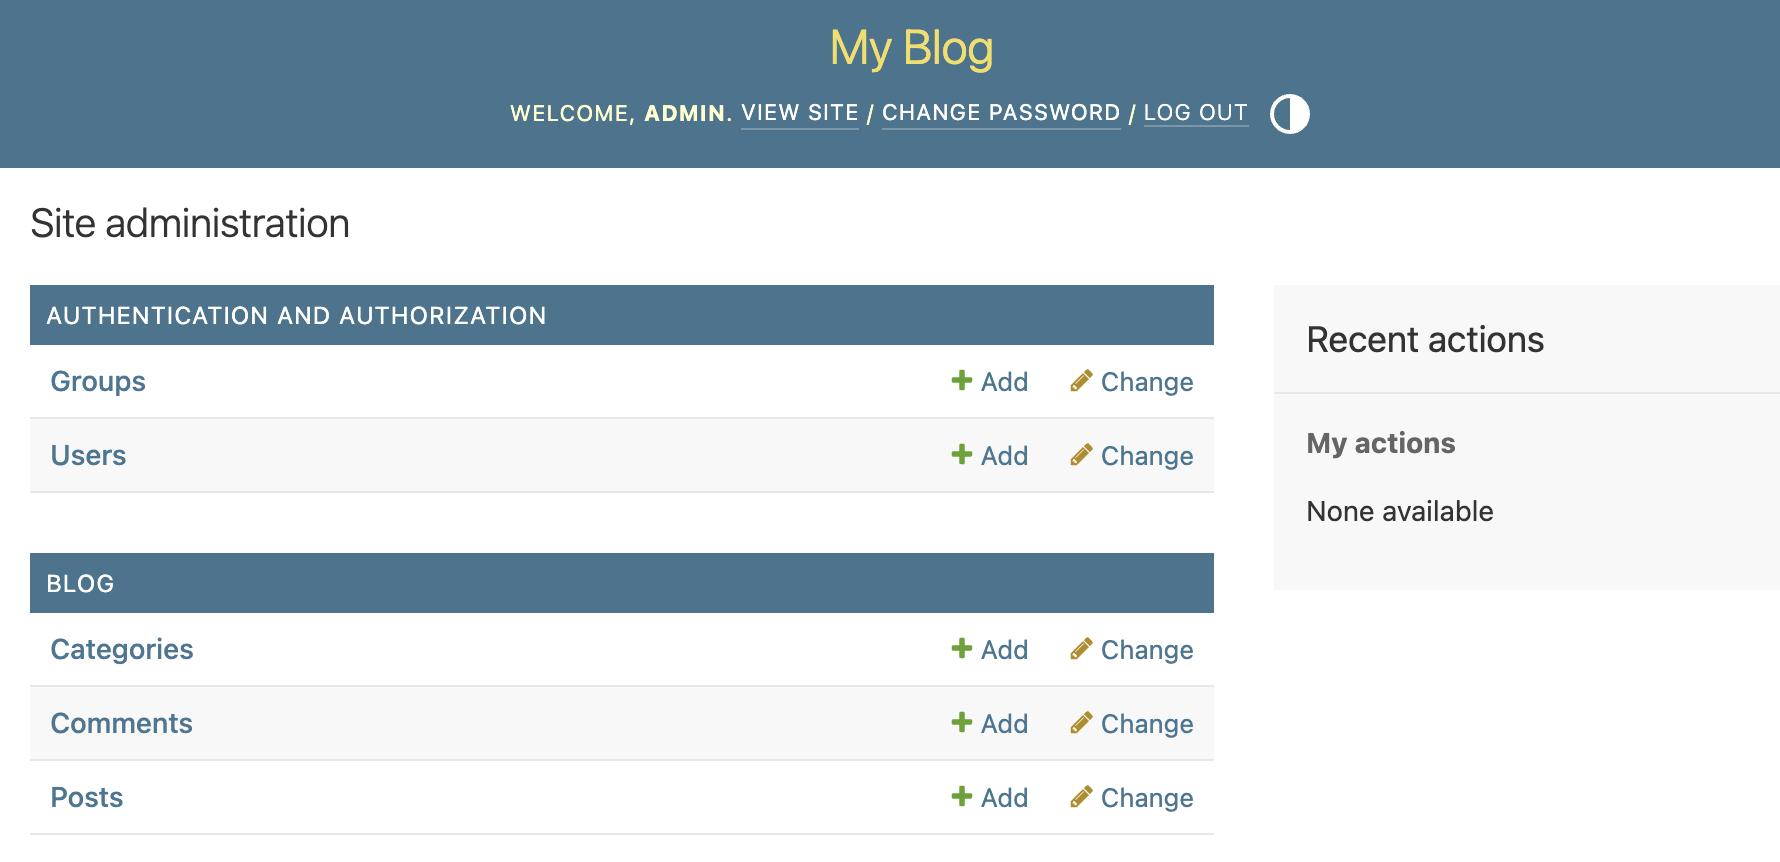



## Customize to show which fields
### list_display
   ```python
   # blog/admin.py
   # instead of using admin.site.register(Category), using:
   @admin.register(Category)
   class CategoryAdmin(admin.ModelAdmin):
      list_display = ('name', 'post_count', 'created_at')
      
      def post_count(self, obj):
         return obj.posts.count()
      post_count.short_description = 'Number of posts'
      
   ```
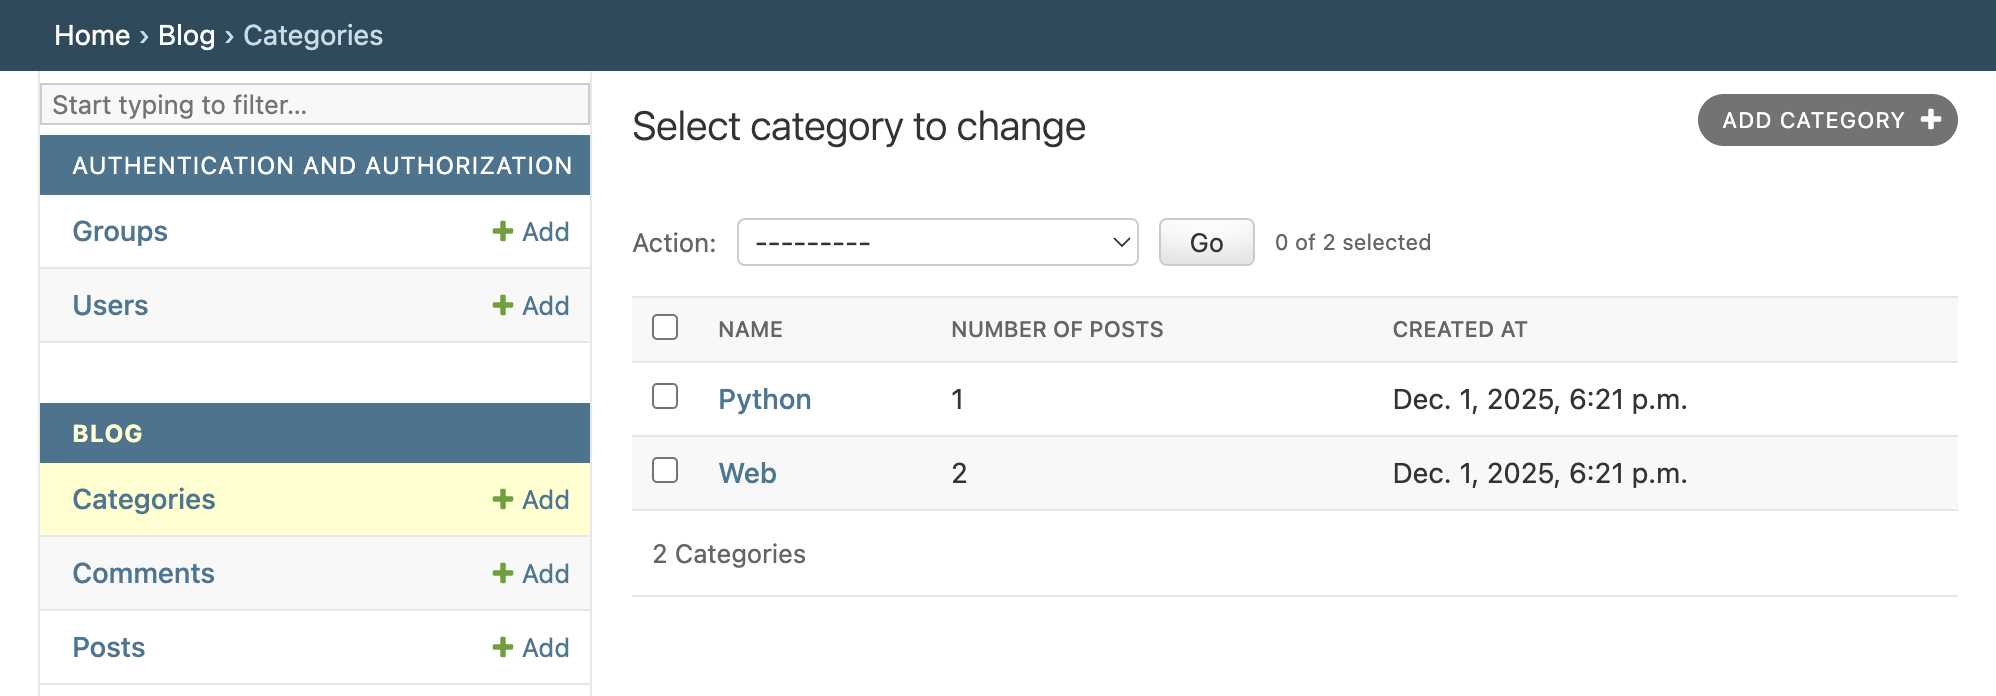



### search_fields
   ```python
   # search by fields
   @admin.register(Post)
   class PostAdmin(admin.ModelAdmin):
      list_display = ('title', 'author', 'published', 'get_categories')
      
      search_fields = ('title', 'author__username', 'content')

      def get_categories(self, obj):
         return ", ".join([c.name for c in obj.categories.all()])
      get_categories.short_description = 'Categories'
   ```

   search string 'first' in the search_fields:
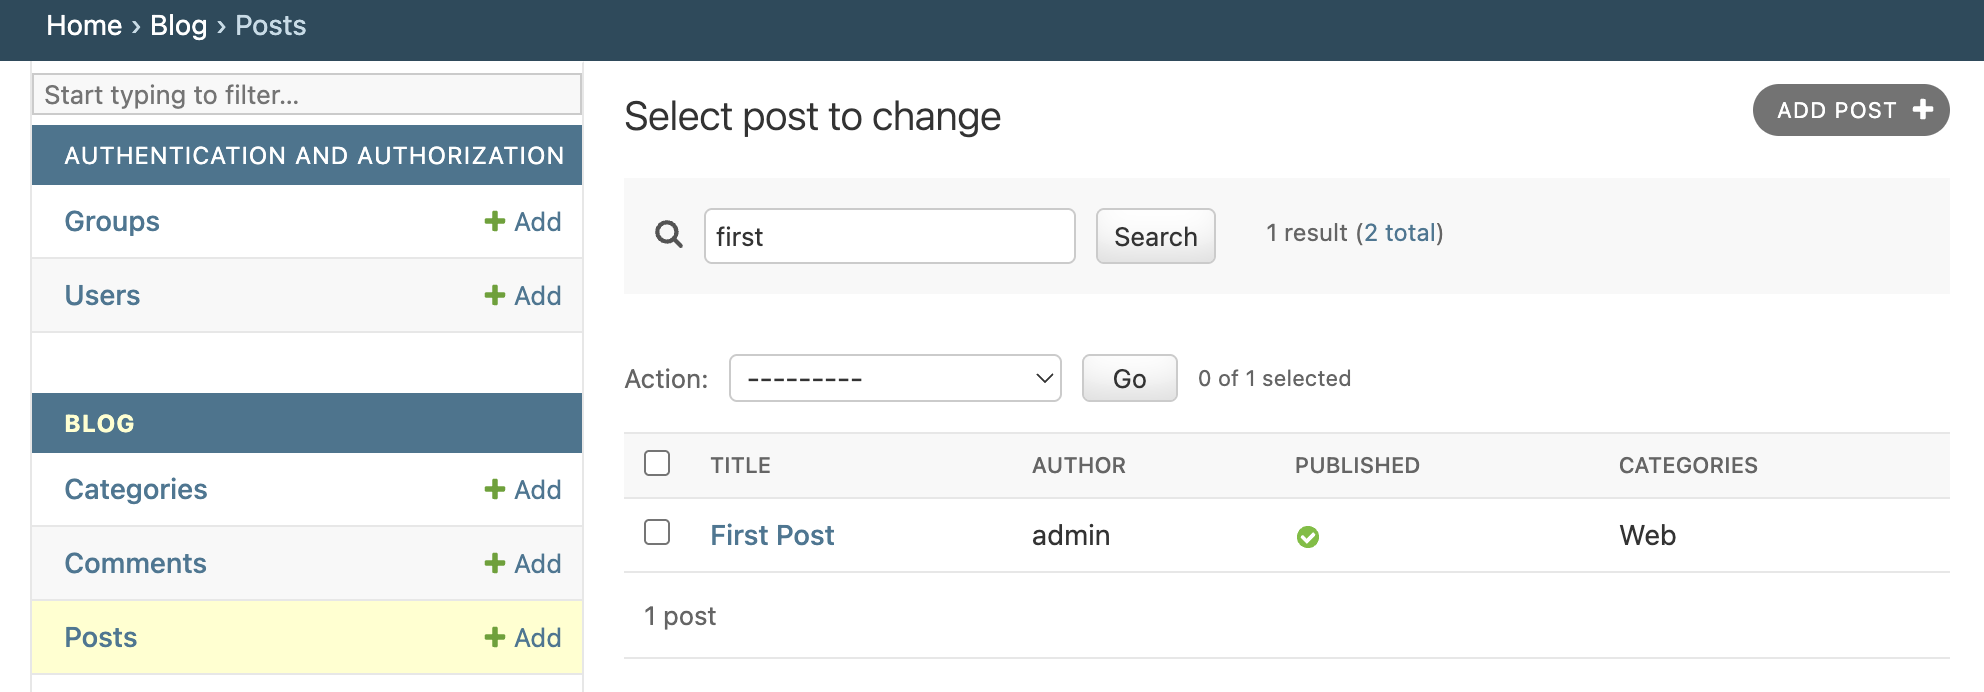

## can also assign user group

Groups are collections of permissions that you can assign to users. Instead of assigning permissions to individual users, you assign them to groups, then add users to those groups 
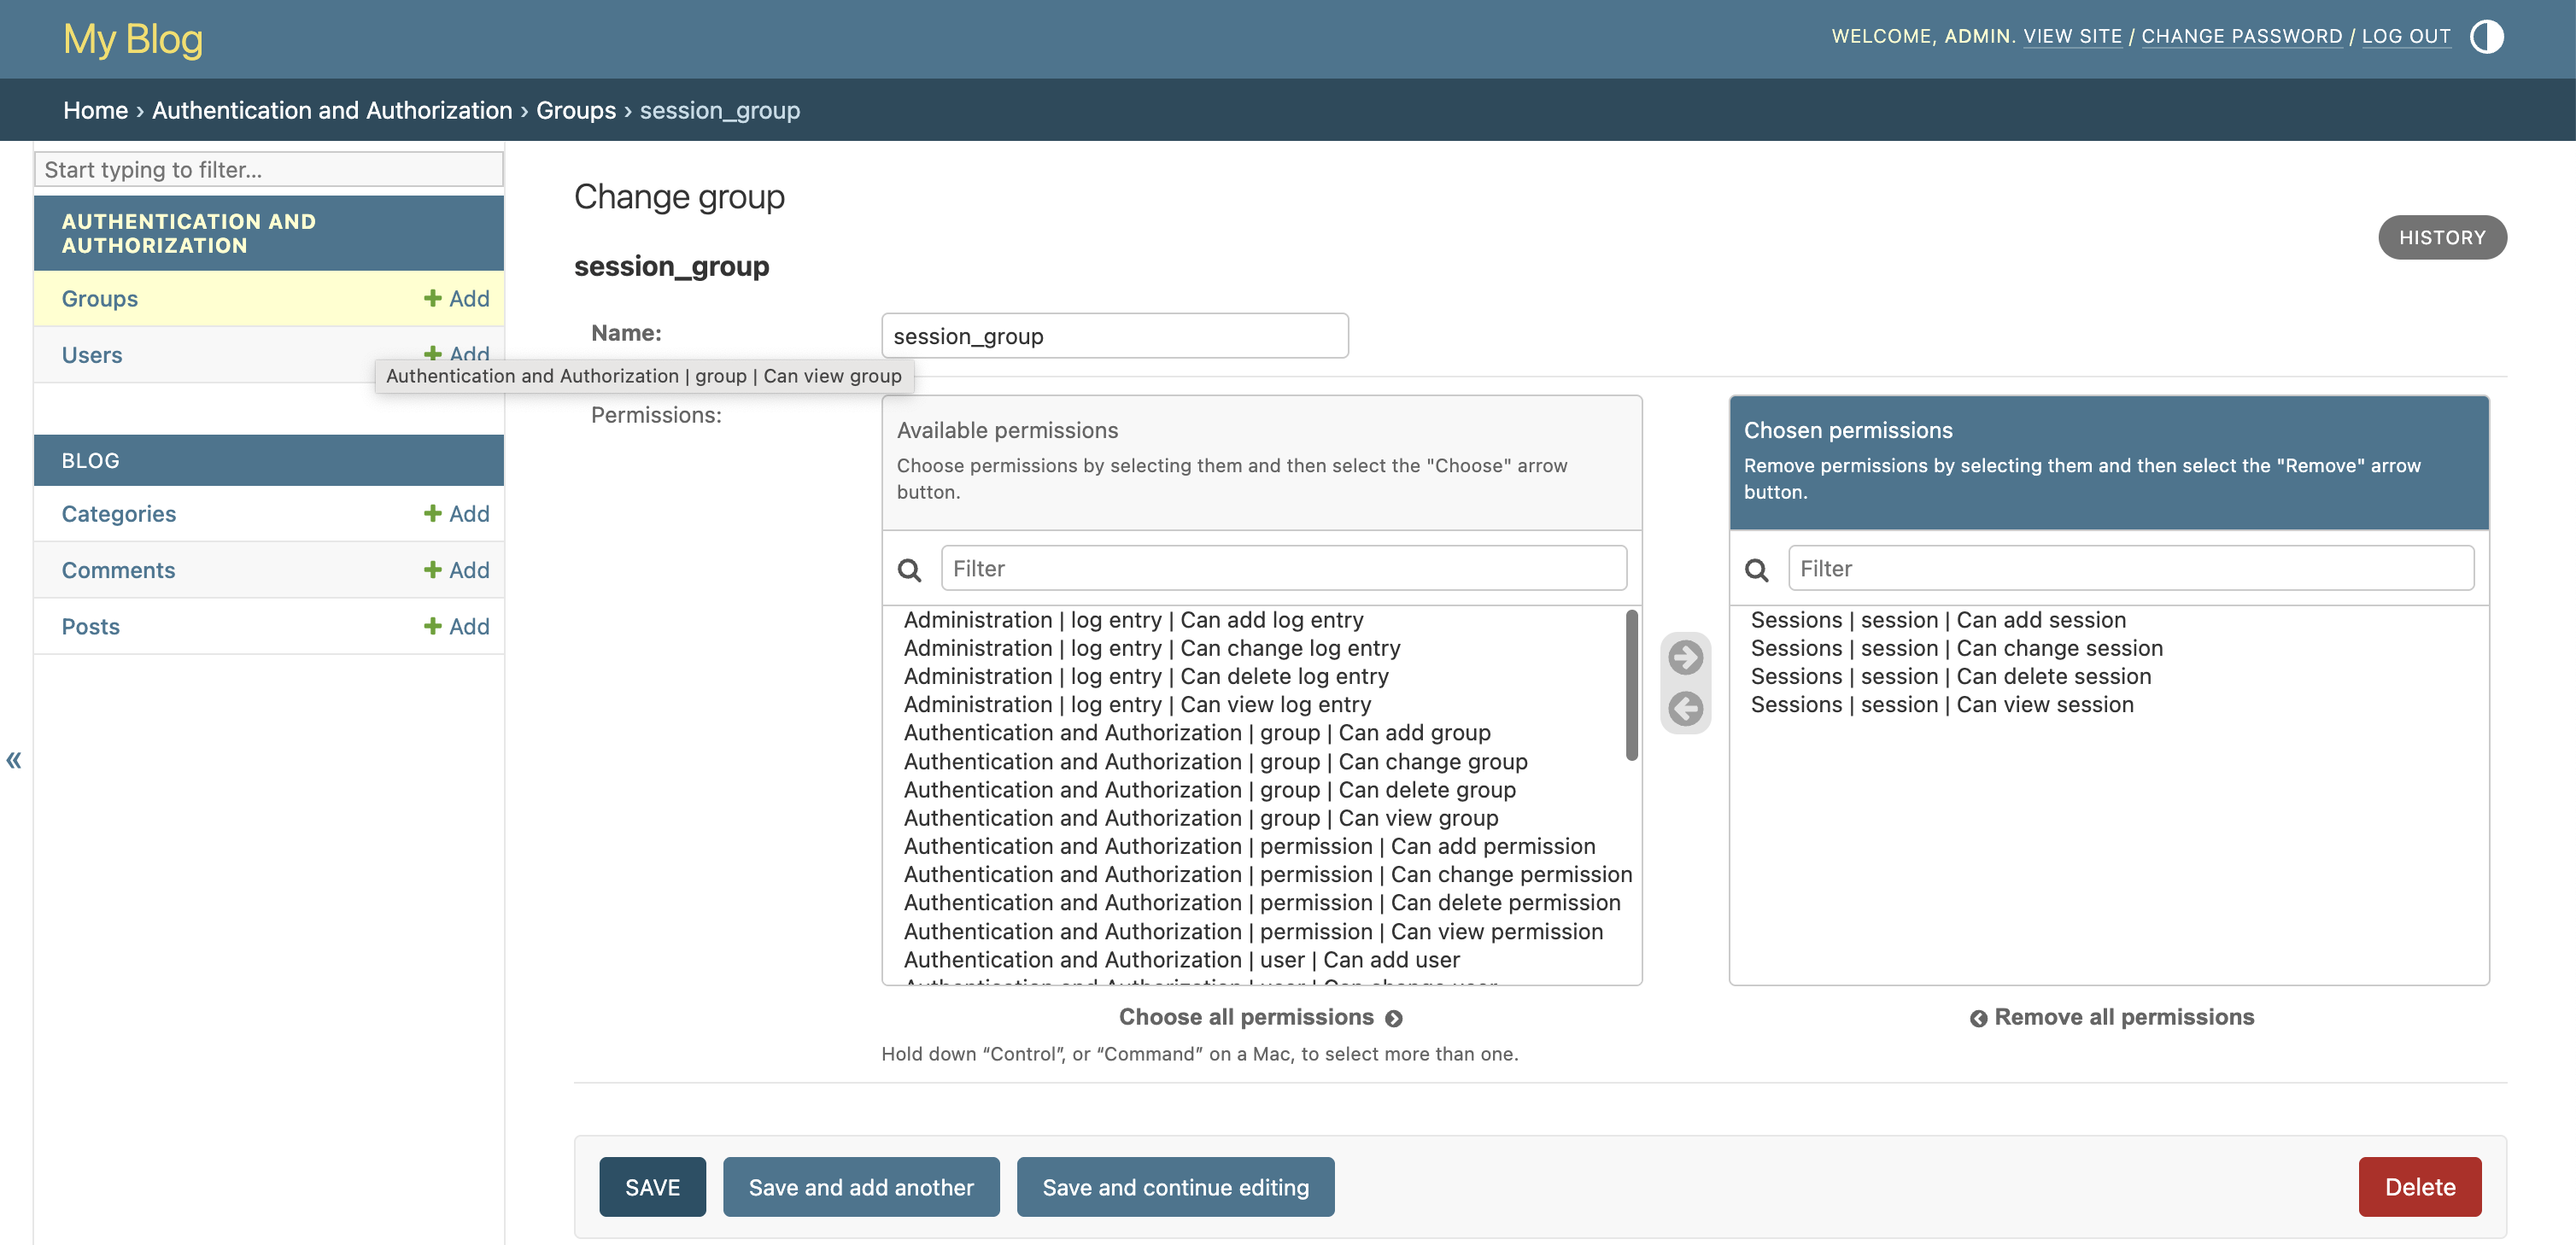

**E-commerce example**    
Groups:
- Customers (view products, place orders)
- Vendors (manage own products)
- Warehouse Staff (update inventory)
- Customer Service (view orders, issue refunds)
- Admins (full access)

**Content Management example**       
Groups:
- Authors (create/edit own posts)
- Editors (edit all posts, publish)
- Moderators (delete comments, ban users)
- Viewers (read-only access)

# Django Sell
start shell:   
```bash
python manage.py shell
```
basic operations, more in [django_shell.py](./django_shell.py)
```python
from blogsite.blog.models import Category, Post, Comment
from django.contrib.auth.models import User

# get object 
post = Post.objects.first()

# create object
cat1 = Category.objects.create(name = 'Tech')
# Alternative: Create but Save Later
cat2 = Category(name='Science')
cat2.save()

# Create user
user = User.objects.create_user('john', 'john@example.com', 'password123')
# Create superuser (for admin access)
User.objects.create_superuser('admin', 'admin@example.com', 'admin123')

# Query
post.categories.all()              # Get all categories for post
post.categories.count()            # Count categories
post.categories.filter(name='Tech')  # Filter categories
# Modify
post.categories.add(cat1)          # Add one
post.categories.add(cat1, cat2)    # Add two categories
post.categories.set([cat1, cat2])  # Replace all
post.categories.remove(cat1)       # Remove one
post.categories.clear()            # Remove all

# Reverse query
cat1.posts.all()               # Get all posts in category
cat1.posts.count()             # Count posts

# Filter posts by category
# Filtering by a Category object, pass the actual model instance
tech = Category.objects.get(name='Tech')
Post.objects.filter(categories=tech)
# Shortcut (filter by the category’s name)
Post.objects.filter(categories__name='Tech')
# case-insensitive
Post.objects.filter(categories__name__iexact='tech')
```
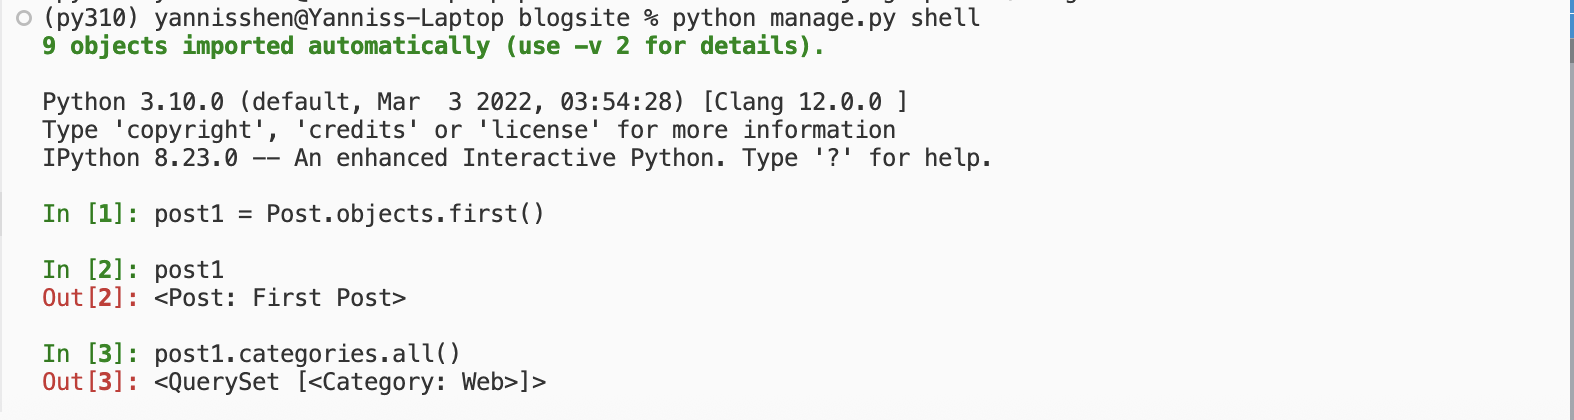

## Django script and save result in txt
1. create Standalone Django script `shell_queries` in project root directory
2. run it and save result
   ```bash
   blogsite % python shell_queries.py > query_output.txt
   ```

# Views

In Django, views are Python functions or classes that receive an HTTP request and return an HTTP response.  

It is the business logic layer.

## View and Routing
1. define `views.py` 
2. includes all routes in app-level `./blog/urls.py`
   ```python
   urlpatterns = [
    path('posts/', views.post_list, name="index"),
    path('posts/<int:post_id>', views.post_detail, name="post_detail"),
    path('categories/<int:category_id>', views.category_post, name="category_posts"),
    path('authors/<int:author_id>', views.author_post, name="author_posts"),   
   ]
   ```

## URL Routing Details

### Two-Level URL Configuration
#### **Project-level URLs** (`blogsite/urls.py`)
```python
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('blog/', include('blog.urls')),  # Delegate to app
    path('admin/', admin.site.urls),
]
```

#### **App-level URLs** (`blog/urls.py`)
```python
from django.urls import path
from blog import views

app_name = 'blog'  # Namespace for URL names

urlpatterns = [
    path('posts/', views.post_list, name="index"),
    path('posts/<int:post_id>', views.post_detail, name="post_detail"),
    path('categories/<int:category_id>', views.category_post, name="category_posts"),
    path('authors/<int:author_id>', views.author_post, name="author_posts"),
]
```


#### URL Patterns Explained
**Basic path syntax:**
```python
path(route, view, kwargs=None, name=None)
```

**URL Parameters:**
- <int:post_id>: Captures integer, passes to view as post_id
- <str:slug>: Captures string
- <uuid:id>: Captures UUID
- <path:path>: Captures any path (including slashes)

**Example URL Flow:**
- Request: http://127.0.0.1:8000/blog/posts/5
- Django checks blogsite/urls.py    
   → Matches 'blog/' → forwards to blog.urls
- Django checks blog/urls.py      
   → Matches 'posts/<int:post_id>'     
   → Calls views.post_detail(request, post_id=5)     

**Why use named URLs?**
- Avoid hardcoding URLs in templates/views
- Easy to change URL patterns without breaking links
- in templates:
  ```html 
  <a href="{% url 'blog:post_detail' post.id %}">{{ post.title }}</a>
    <!-- Generates: /blog/posts/5 -->
  ```
- in views:
    ```python
    from django.urls import reverse
    from django.shortcuts import redirect

    def some_view(request):
        url = reverse('blog:post_detail', args=[5])
        return redirect(url)
    ``` 

# Templates
Django templates separate presentation (HTML) from business logic (Python). They use **Django Template Language (DTL)**.

Directory Structure:

```text
    blog/                          # app
    └── templates/
        ├── base.html              # Base template
        ├── index.html             # Post list
        ├── post_detail.html       # Single post
        ├── category_posts.html    # Category posts
        └── author_posts.html      # Author posts
```

## Configuring Templates
In `./blogsite/blogsite/settings.py`, templates are configured automatically
```python
TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [],  # Project-level template directories
        'APP_DIRS': True,  # Look for templates in each app's templates/ folder
        'OPTIONS': {...},
    },
]
```
## Rendering Templates in Views
In `./blogsite/blog/views.py`:
```python
from django.shortcuts import render, get_object_or_404
from blog.models import Post, Category

def post_list(request):
    posts = Post.objects.filter(published=True).all()
    context = {
        'posts': posts
    }
    return render(request, 'index.html', context)

def post_detail(request, post_id):
    post = Post.objects.get(id=post_id)
    comments = post.comments.all()
    context = {
        'post': post,
        'comments': comments
    }
    return render(request, 'post_detail.html', context)
```

## Django Template Language (DTL)  
(just need to know there's such thing, no need of further knowledge, due to frontend backend seperation)

### Variables
```html
    <!-- Access context variables -->
    {{ post.title }}
    {{ post.author.username }}
    {{ post.created_at }}

    <!-- Access methods (without parentheses) -->
    {{ post.comment_count }}
    {{ post.get_excerpt }}
```

### Filters

```html
<!-- String manipulation -->
{{ post.title|upper }}
{{ post.title|lower }}
{{ post.title|title }}
{{ post.title|truncatewords:10 }}

<!-- Date formatting -->
{{ post.created_at|date:"Y-m-d" }}
{{ post.created_at|date:"F j, Y" }}

<!-- Default values -->
{{ post.subtitle|default:"No subtitle" }}

<!-- Chaining filters -->
{{ post.title|lower|truncatewords:5 }}
```

### For loops

```html
    {% for post in posts %}
        <h2>{{ post.title }}</h2>
        <p>{{ post.content }}</p>
    {% empty %}
        <p>No posts available.</p>
    {% endfor %}

    <!-- Loop variables -->
    {% for post in posts %}
        {{ forloop.counter }}  <!-- 1, 2, 3... -->
        {{ forloop.counter0 }} <!-- 0, 1, 2... -->
        {{ forloop.first }}    <!-- True on first iteration -->
        {{ forloop.last }}     <!-- True on last iteration -->
    {% endfor %}
```

### If Statements

```html
    {% if post.published %}
        <span class="published">Published</span>
    {% else %}
        <span class="draft">Draft</span>
    {% endif %}

    {% if post.categories.count > 1 %}
        <span>Multiple categories</span>
    {% elif post.categories.count == 1 %}
        <span>One category</span>
    {% else %}
        <span>No categories</span>
    {% endif %}
```

### URL generation
```html
    <a href="{% url 'blog:post_detail' post.id %}">{{ post.title }}</a>
    <a href="{% url 'blog:category_posts' category.id %}">{{ category.name }}</a>
    <a href="{% url 'blog:author_posts' post.author.id %}">{{ post.author.username }}</a>
```

### Comments

```html
    {# Single line comment #}

    {% comment %}
    Multi-line comment
    Can span multiple lines
    {% endcomment %}
```

### Template Inheritance
**Base template (`base.html`):**
```html
<!DOCTYPE html>
...
```

**Child template (`index.html`):**
```html
{% extends 'base.html' %}
...
```

**Include Templates**    
Break huge template into parts, include or reuse them:
```html
<!-- In main template -->
{% include 'partials/post_card.html' with post=post %}

<!-- partials/post_card.html -->
<div class="post-card">
    <h3>{{ post.title }}</h3>
    <p>{{ post.get_excerpt }}</p>
</div>
```

## Template Best Practices

- Keep logic minimal: Templates for presentation, views for logic
- Use template inheritance: DRY (Don't Repeat Yourself)
- Create custom template tags/filters: For complex logic
- Use includes: Break large templates into smaller parts
- Escape by default: Django auto-escapes HTML (prevents XSS)